# Lab 2 - Modelling



## Description

### Author: Kevin Paganini
### Assignment: Lab 2

### Imports and setup

This assignment walks through two different experiments. The first is a gaussian distribution model, where we feed in    
various parameters. The second is a multiple linear regression model on the Avertising dataset, where we are trying to    
predict the sales in dollars. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math


gauss_dist_file_path = os.path.join('Data', 'gaussdist.csv')
advertising_file_path = os.path.join('Data', 'advertising.csv')
fontsize = 16


# Part 1 - Given data

In [2]:
gauss = pd.read_csv(gauss_dist_file_path, header=None)

In [3]:
gauss.head()


,0,1
0,6.99,0.156842
1,8.90,0.007897
2,9.58,0.001551
3,5.46,0.318990
4,1.38,0.001396


### 2) Identify the columns associated with the response variable and the feature variable. 

The zero column in the pandas dataframe is the feature and the one column is the response.

## 

### 3) The features and response variables should be stored in separate numpy arrays.

In [4]:
X_gauss_csv = np.array(gauss[gauss.columns[0]])
y_gauss_csv = np.array(gauss[gauss.columns[1]])


### 4. Plot the feature (x-axis) versus the response (y-axis) of the gaussdist.csv dataset. Make sure to label your plot. 

Text(0.5, 1.0, 'Gaussian distribution of data')

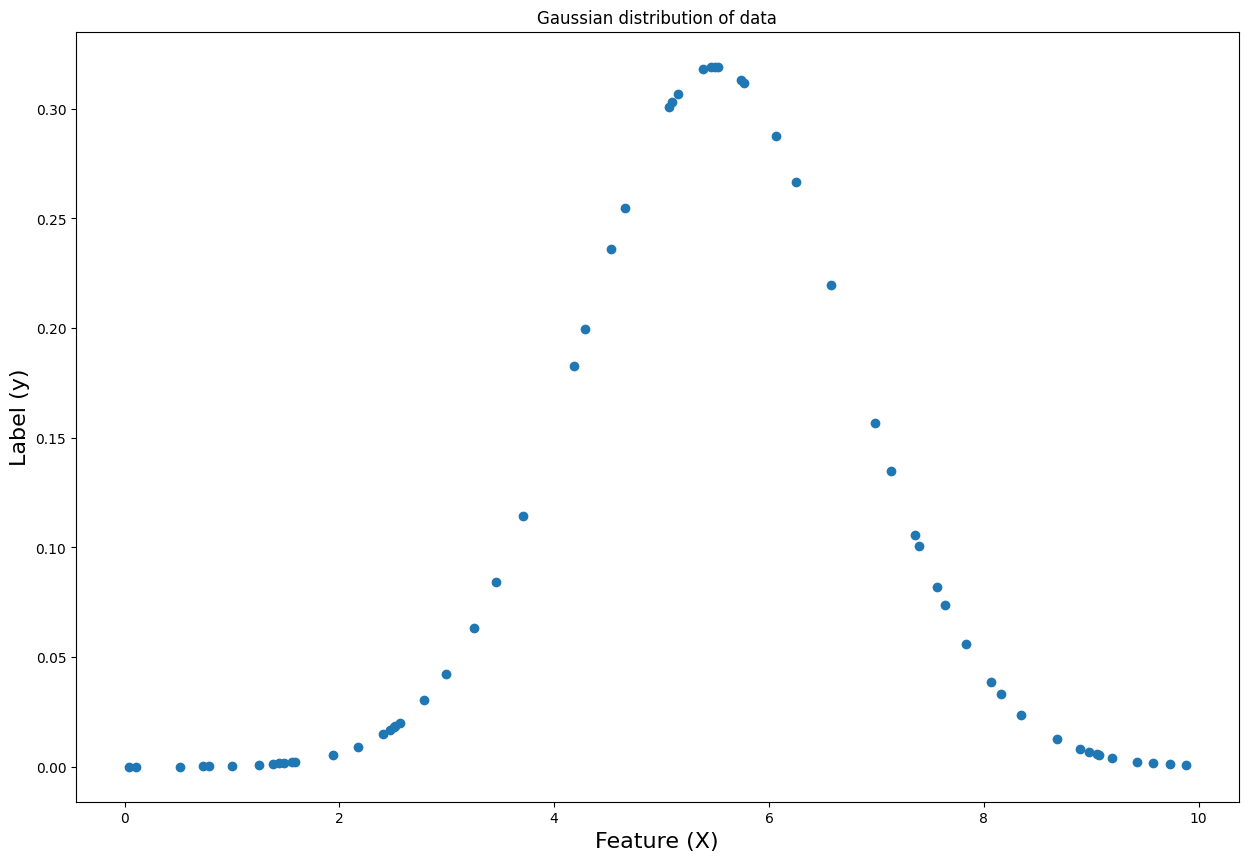

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))


ax.scatter(X_gauss_csv, y_gauss_csv)
ax.set_xlabel('Feature (X)', fontsize=fontsize)
ax.set_ylabel('Label (y)', fontsize=fontsize)
ax.set_title('Gaussian distribution of data')


# Part 2 - Model Familiarity

Gaussian Distribution Formula:
$$
f(x) = \frac {1}{(\mu\sqrt{2\pi})} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

a. Model Parameters: 
$$
\mu\\\sigma
$$

b. Independent Variables:
$$
x
$$

c. Dependent Variables:
$$
f(x)
$$
(The output of the model)

# Part 3 - Model Implementation

Creating model parameter matrix

In [6]:
model_params_mu = np.array([1, 1, 5, 6]).reshape(4, 1)
model_params_sigma = np.array([0.75, 1.25, 1.25, 1.25]).reshape(4, 1)
model_params = np.hstack((model_params_mu, model_params_sigma))
print(model_params)

[[1.   0.75]
 [1.   1.25]
 [5.   1.25]
 [6.   1.25]]


$$
f(x) = \frac {1}{(\mu\sqrt{2\pi})} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

In [7]:



def _gauss_model(x, mu, sigma):
    frac = 1 / (mu * math.sqrt(2*math.pi))
    exp = -1/2 * math.pow(((x-mu)/sigma), 2)
    ret = frac * math.pow(math.e, exp)
    return ret

def predict(x, mu, sigma):
    
    
    gauss = np.vectorize(_gauss_model)
    ret = gauss(x, mu, sigma)
    return ret


model_params[0,:]

array([1.  , 0.75])

In [8]:

# Could implement an sklearn class instead like so
from sklearn.base import RegressorMixin, BaseEstimator

# Implementation of Gaussian Distribution model using sklearn
class Gauss_Model(BaseEstimator, RegressorMixin):
    def fit(self, X, mu, sigma):
        self.X = X
        self.mu = mu
        self.sigma = sigma
        return self
    
    def predict(self, X):
        gauss = np.vectorize(_gauss_model)
        ret = gauss(X, self.mu, self.sigma)
        return ret





## Part 4 - Model Output and Visualization

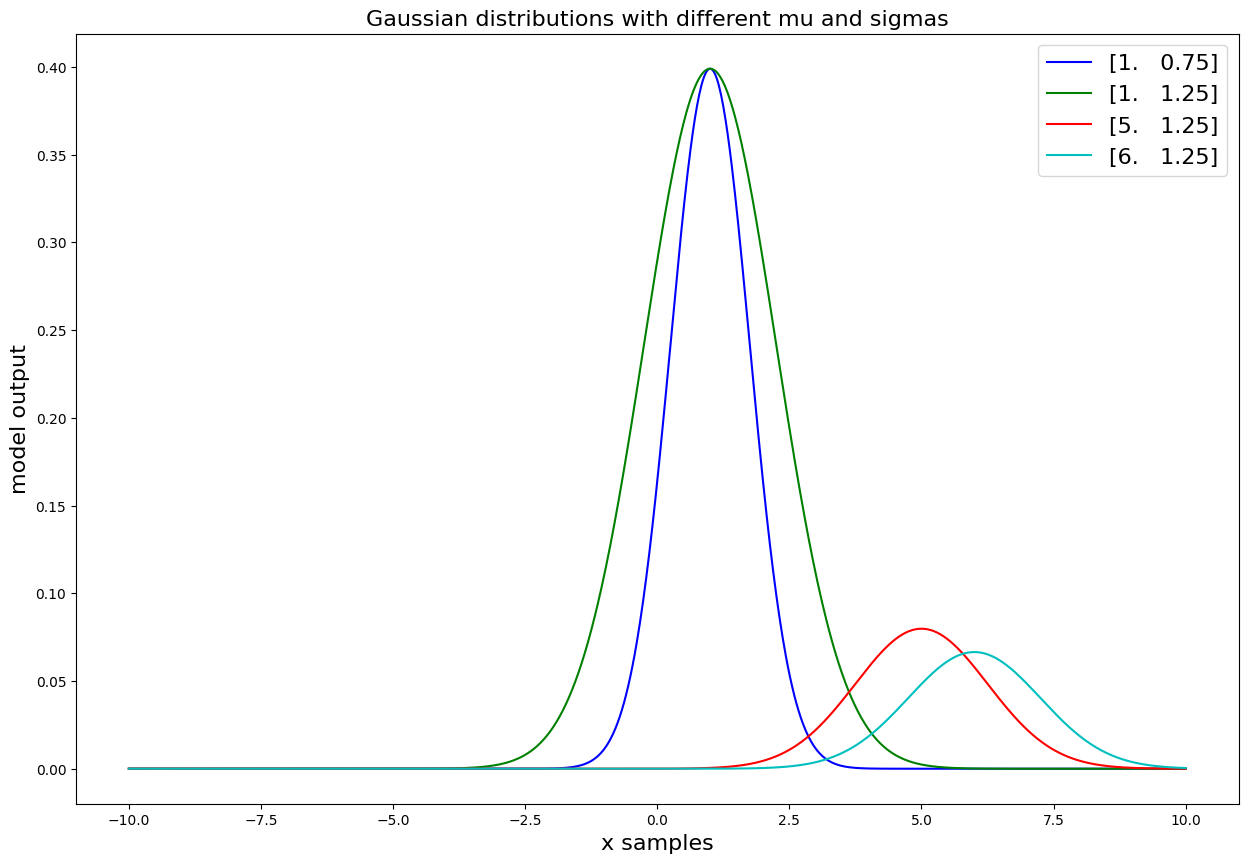

In [9]:
i = 0
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#ffa500']
fig, ax = plt.subplots(figsize=(15, 10))

for param in model_params:
    ret = predict(np.linspace(-10, 10, 1000), param[0], param[1])
    ax.plot(np.linspace(-10, 10, 1000), ret, color=colors[i], label=str(param))
    i += 1
    
ax.set_title('Gaussian distributions with different mu and sigmas', fontsize=fontsize)
ax.set_xlabel('x samples', fontsize=fontsize)
ax.set_ylabel('model output', fontsize=fontsize)
ax.legend(loc='best', fontsize=fontsize)

# Part 5 - Error between Model and Data

Mathematical formula for Mean Absolute Error
Sum of all the absolute errors over total samples

n = total samples    
y_hat = predicted    
y = actual    

$$

\frac{\sum_{i=1}^n |\hat{y_i}- y_i|}{n}
$$

All this is doing is getting the average error


Predicted values: y_hat   
Dependent variables: y_hat (y_hat is the dependent variable because it is calculated from all the input (independent) variables)


Text(0.5, 1.0, 'Gaussian models with various parameters')

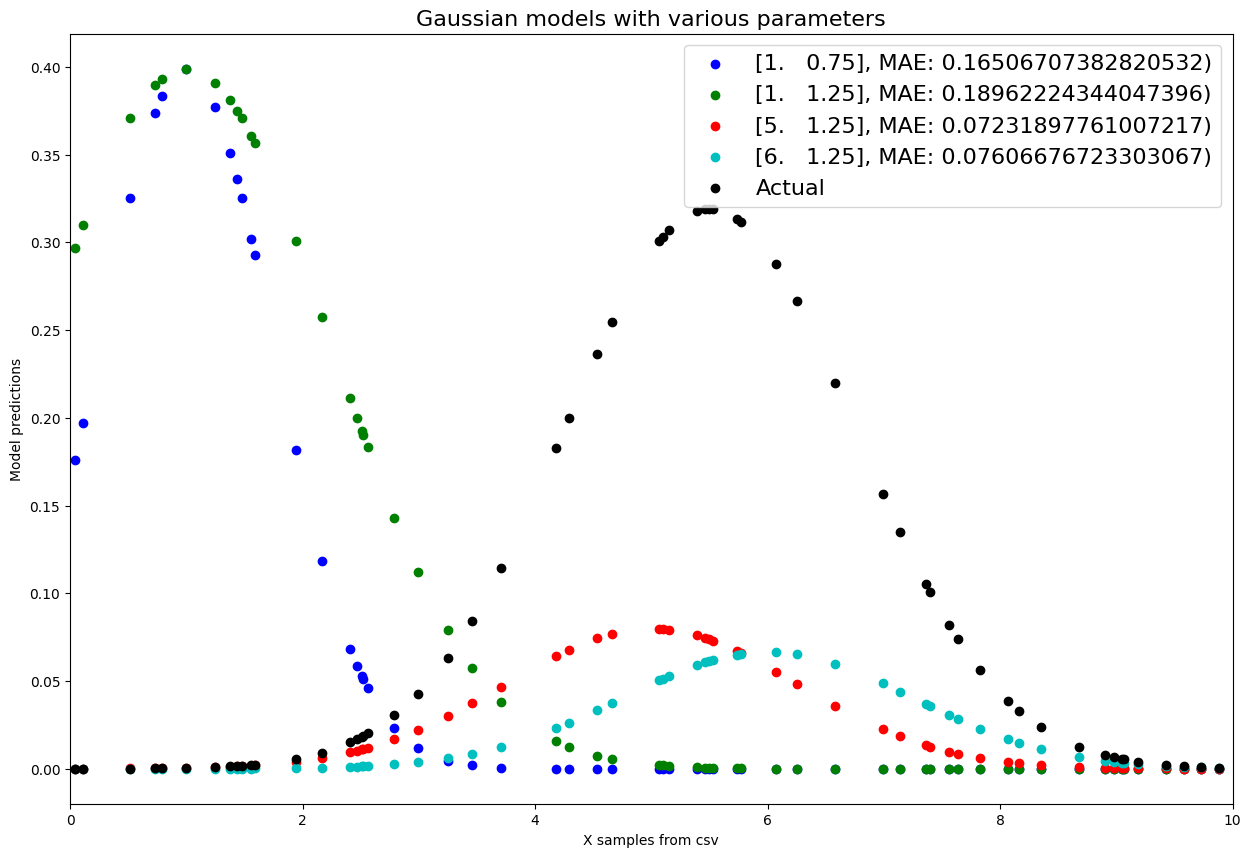

In [10]:
# making function for mean absolute error
mae = lambda x : np.sum(np.absolute(x - y_gauss_csv)) / len(y_gauss_csv)

# plt setup
fig, ax = plt.subplots(figsize=(15, 10))
plt.xlim(0, 10)

# going through params and applying mae
i = 0
for param in model_params:
    predictions = predict(X_gauss_csv, param[0], param[1])
    ax.scatter(X_gauss_csv, predictions, color=colors[i], label=f'{str(param)}, MAE: {mae(predictions)})')
    i += 1

ax.scatter(X_gauss_csv, y_gauss_csv, color='black', label='Actual')

ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('X samples from csv')
ax.set_ylabel('Model predictions')
ax.set_title('Gaussian models with various parameters', fontsize=fontsize)




# Experiment 2 (Not really this turned into doing a lot of sklearn stuff)

See next experiment 2 label for the actual lab part

The following section implements KNN and linear regression models with sklearn.
It also implements a grid search for the best number of neighbors

Spoiler: (its 5)

In [11]:
ads = pd.read_csv(advertising_file_path)

# dropping useless stuff
ads.drop(['Unnamed: 0'], inplace=True, axis=1)
ads.head()


,Offset,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,1,17.2,45.9,69.3,9.3
3,1,151.5,41.3,58.5,18.5
4,1,180.8,10.8,58.4,12.9


In [12]:
# What is the offset for?
X = np.array(ads[['Offset','TV', 'radio', 'newspaper']])
y = np.array(ads['sales'])


0 0
0 1
1 0
1 1


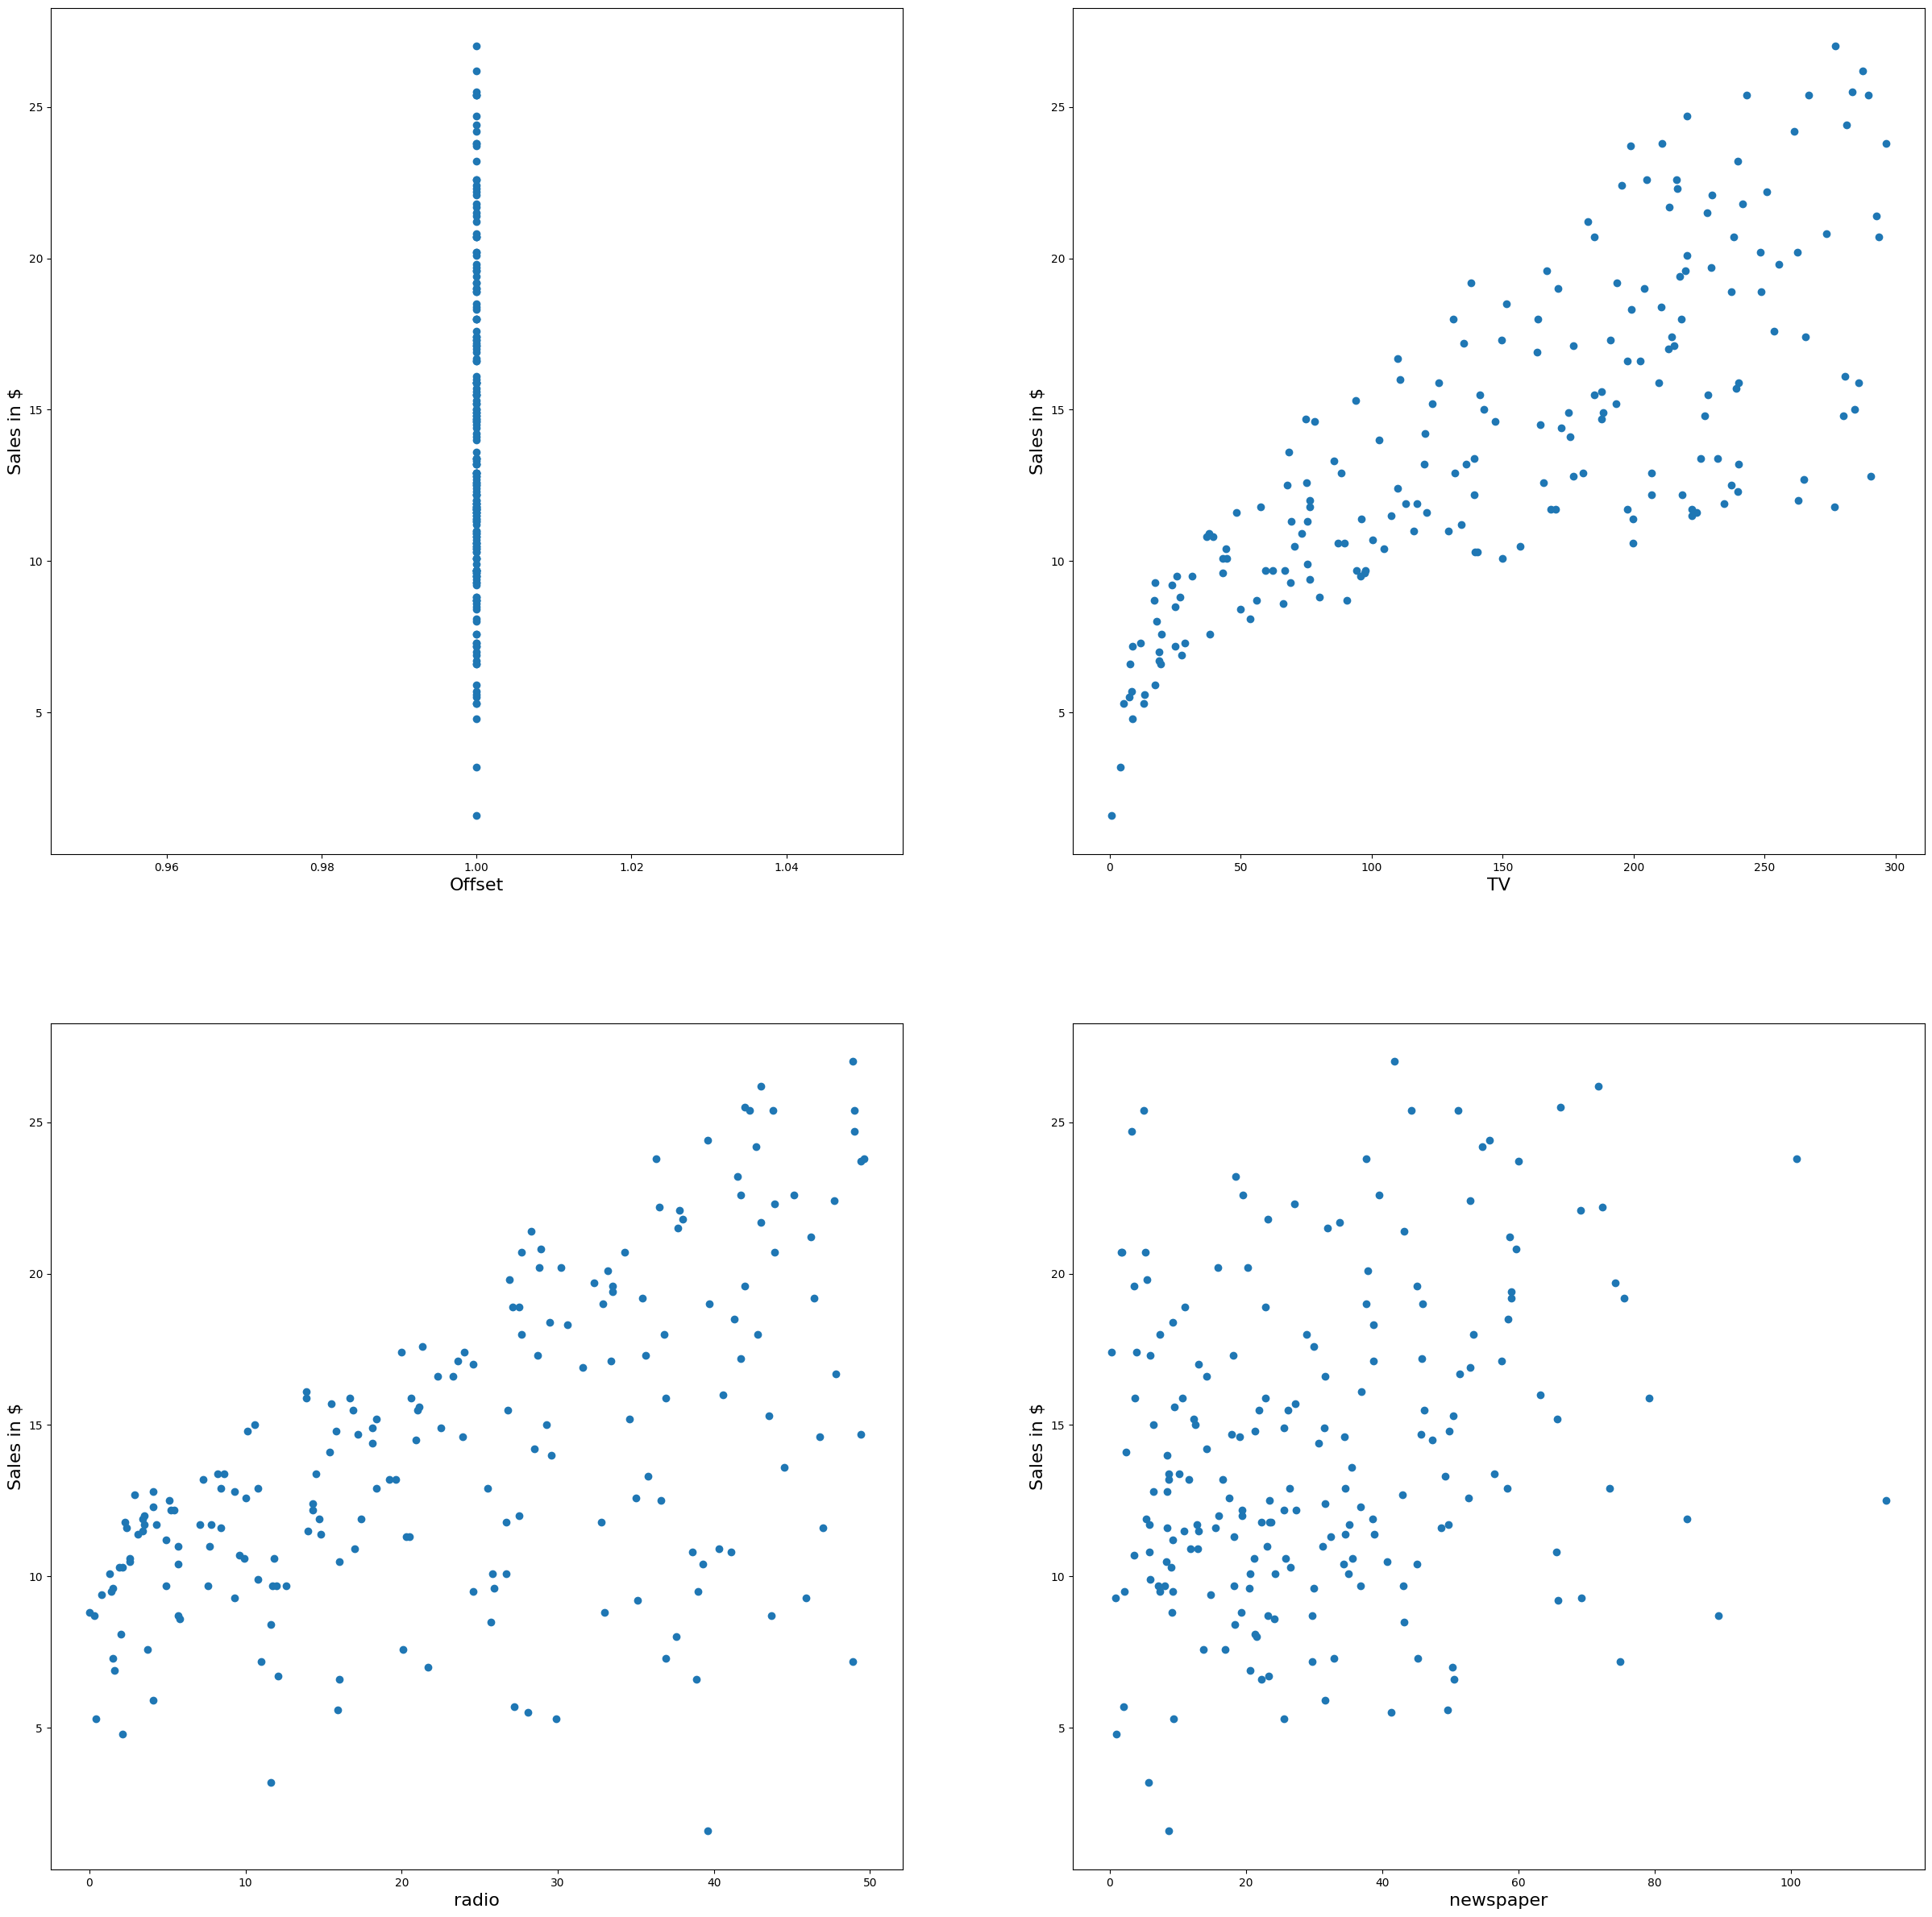

In [13]:
fig, ax = plt.subplots(figsize=(30,30), ncols=2, nrows=2)

i = 0
for row in range(2):
    for col in range(2):
        print(row, col)
        ax[row, col].scatter(X[:,i], y)
        ax[row, col].set_xlabel(ads.columns[i], fontsize=fontsize)
        ax[row, col].set_ylabel('Sales in $', fontsize=fontsize)
        
        i += 1
    


(200, 4)
(200, 4)
(200, 8)
[    1   230    37    69     1 52946  1428  4788]
Mean squared error: 2.22027444031559
Mean absolute error: 1.1466384488813481


Text(0.5, 1.0, 'Linear regression model prediction vs actual')

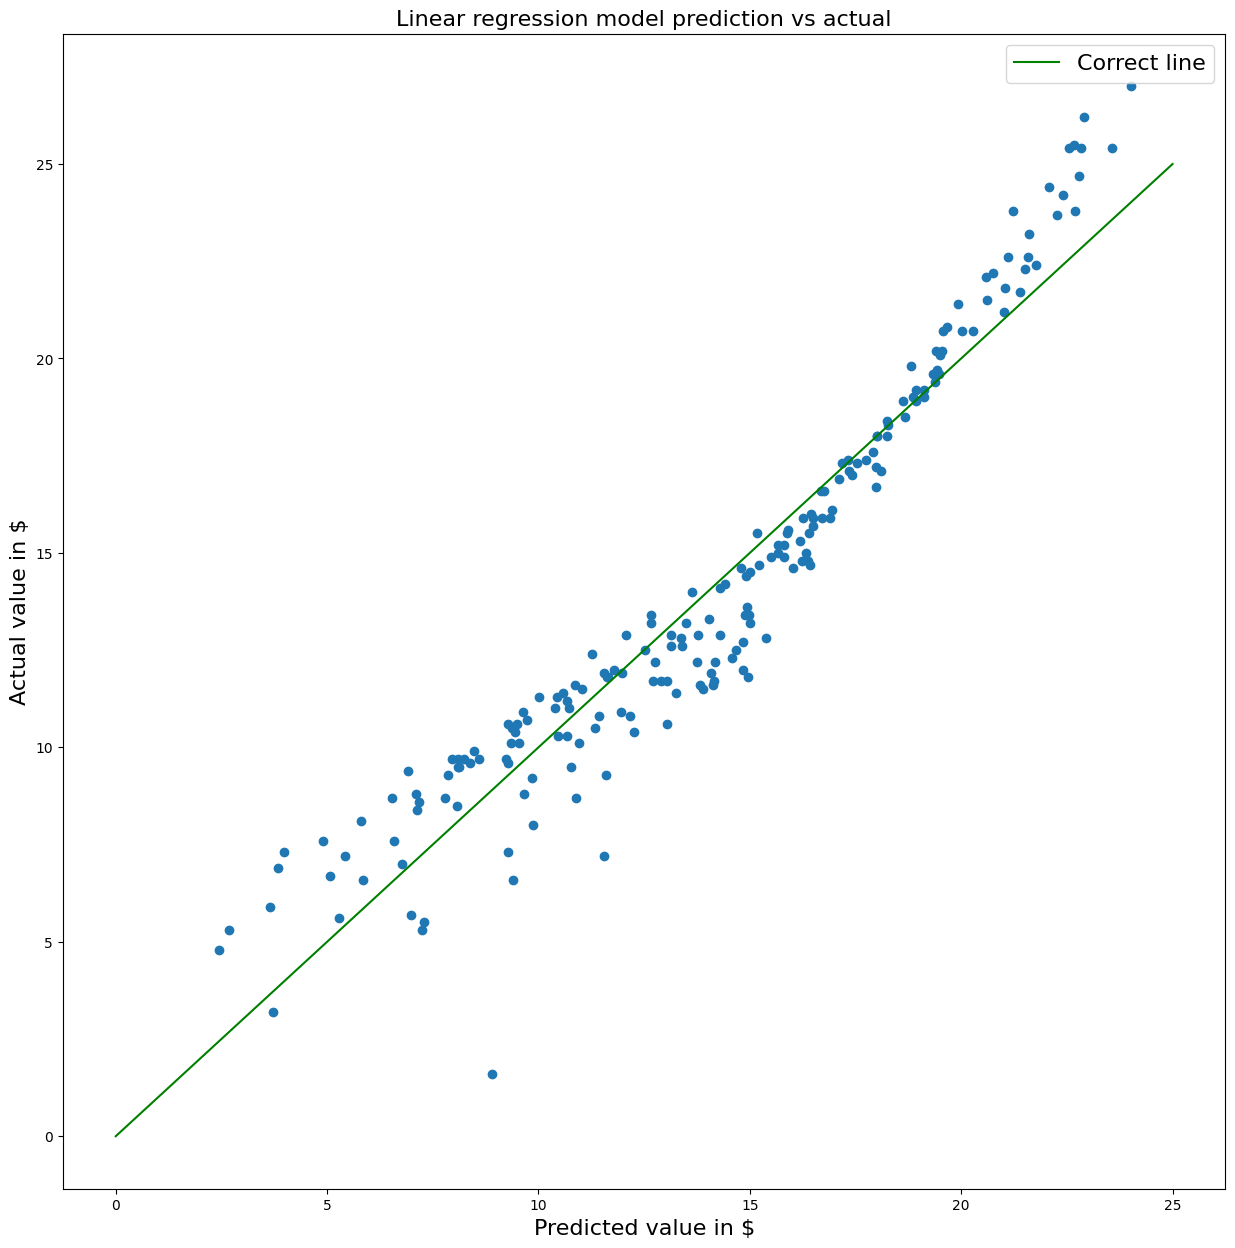

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


    


lin_reg = LinearRegression()
powers = np.ones(800).reshape(200, 4) * 2
X_poly = np.power(X, powers)
print(X_poly.shape)
print(X.shape)
X_prepped = np.hstack((X, X_poly)).astype(int)
print(X_prepped.shape)
print(X_prepped[0])
lin_reg.fit(X_prepped, y)
predictions = lin_reg.predict(X_prepped)

mean_squared_error = mean_squared_error(y, predictions)
print(f'Mean squared error: {mean_squared_error}')
print(f'Mean absolute error: {mean_absolute_error(y, predictions)}')



fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(predictions, y)
line_x = np.array(np.linspace(0, 25, 25))
line_y = np.array(np.linspace(0,25, 25))

ax.plot(line_x, line_y, color='green', label='Correct line')
ax.set_xlabel('Predicted value in $', fontsize=fontsize)
ax.set_ylabel('Actual value in $', fontsize=fontsize)
ax.legend(loc='best', fontsize=fontsize)
ax.set_title('Linear regression model prediction vs actual', fontsize=fontsize)




0 0
0 1
1 0
1 1
0 0
0 1
1 0
1 1


Text(0.5, 0.98, 'Linear regression model predictions (orange) vs actual (blue)')

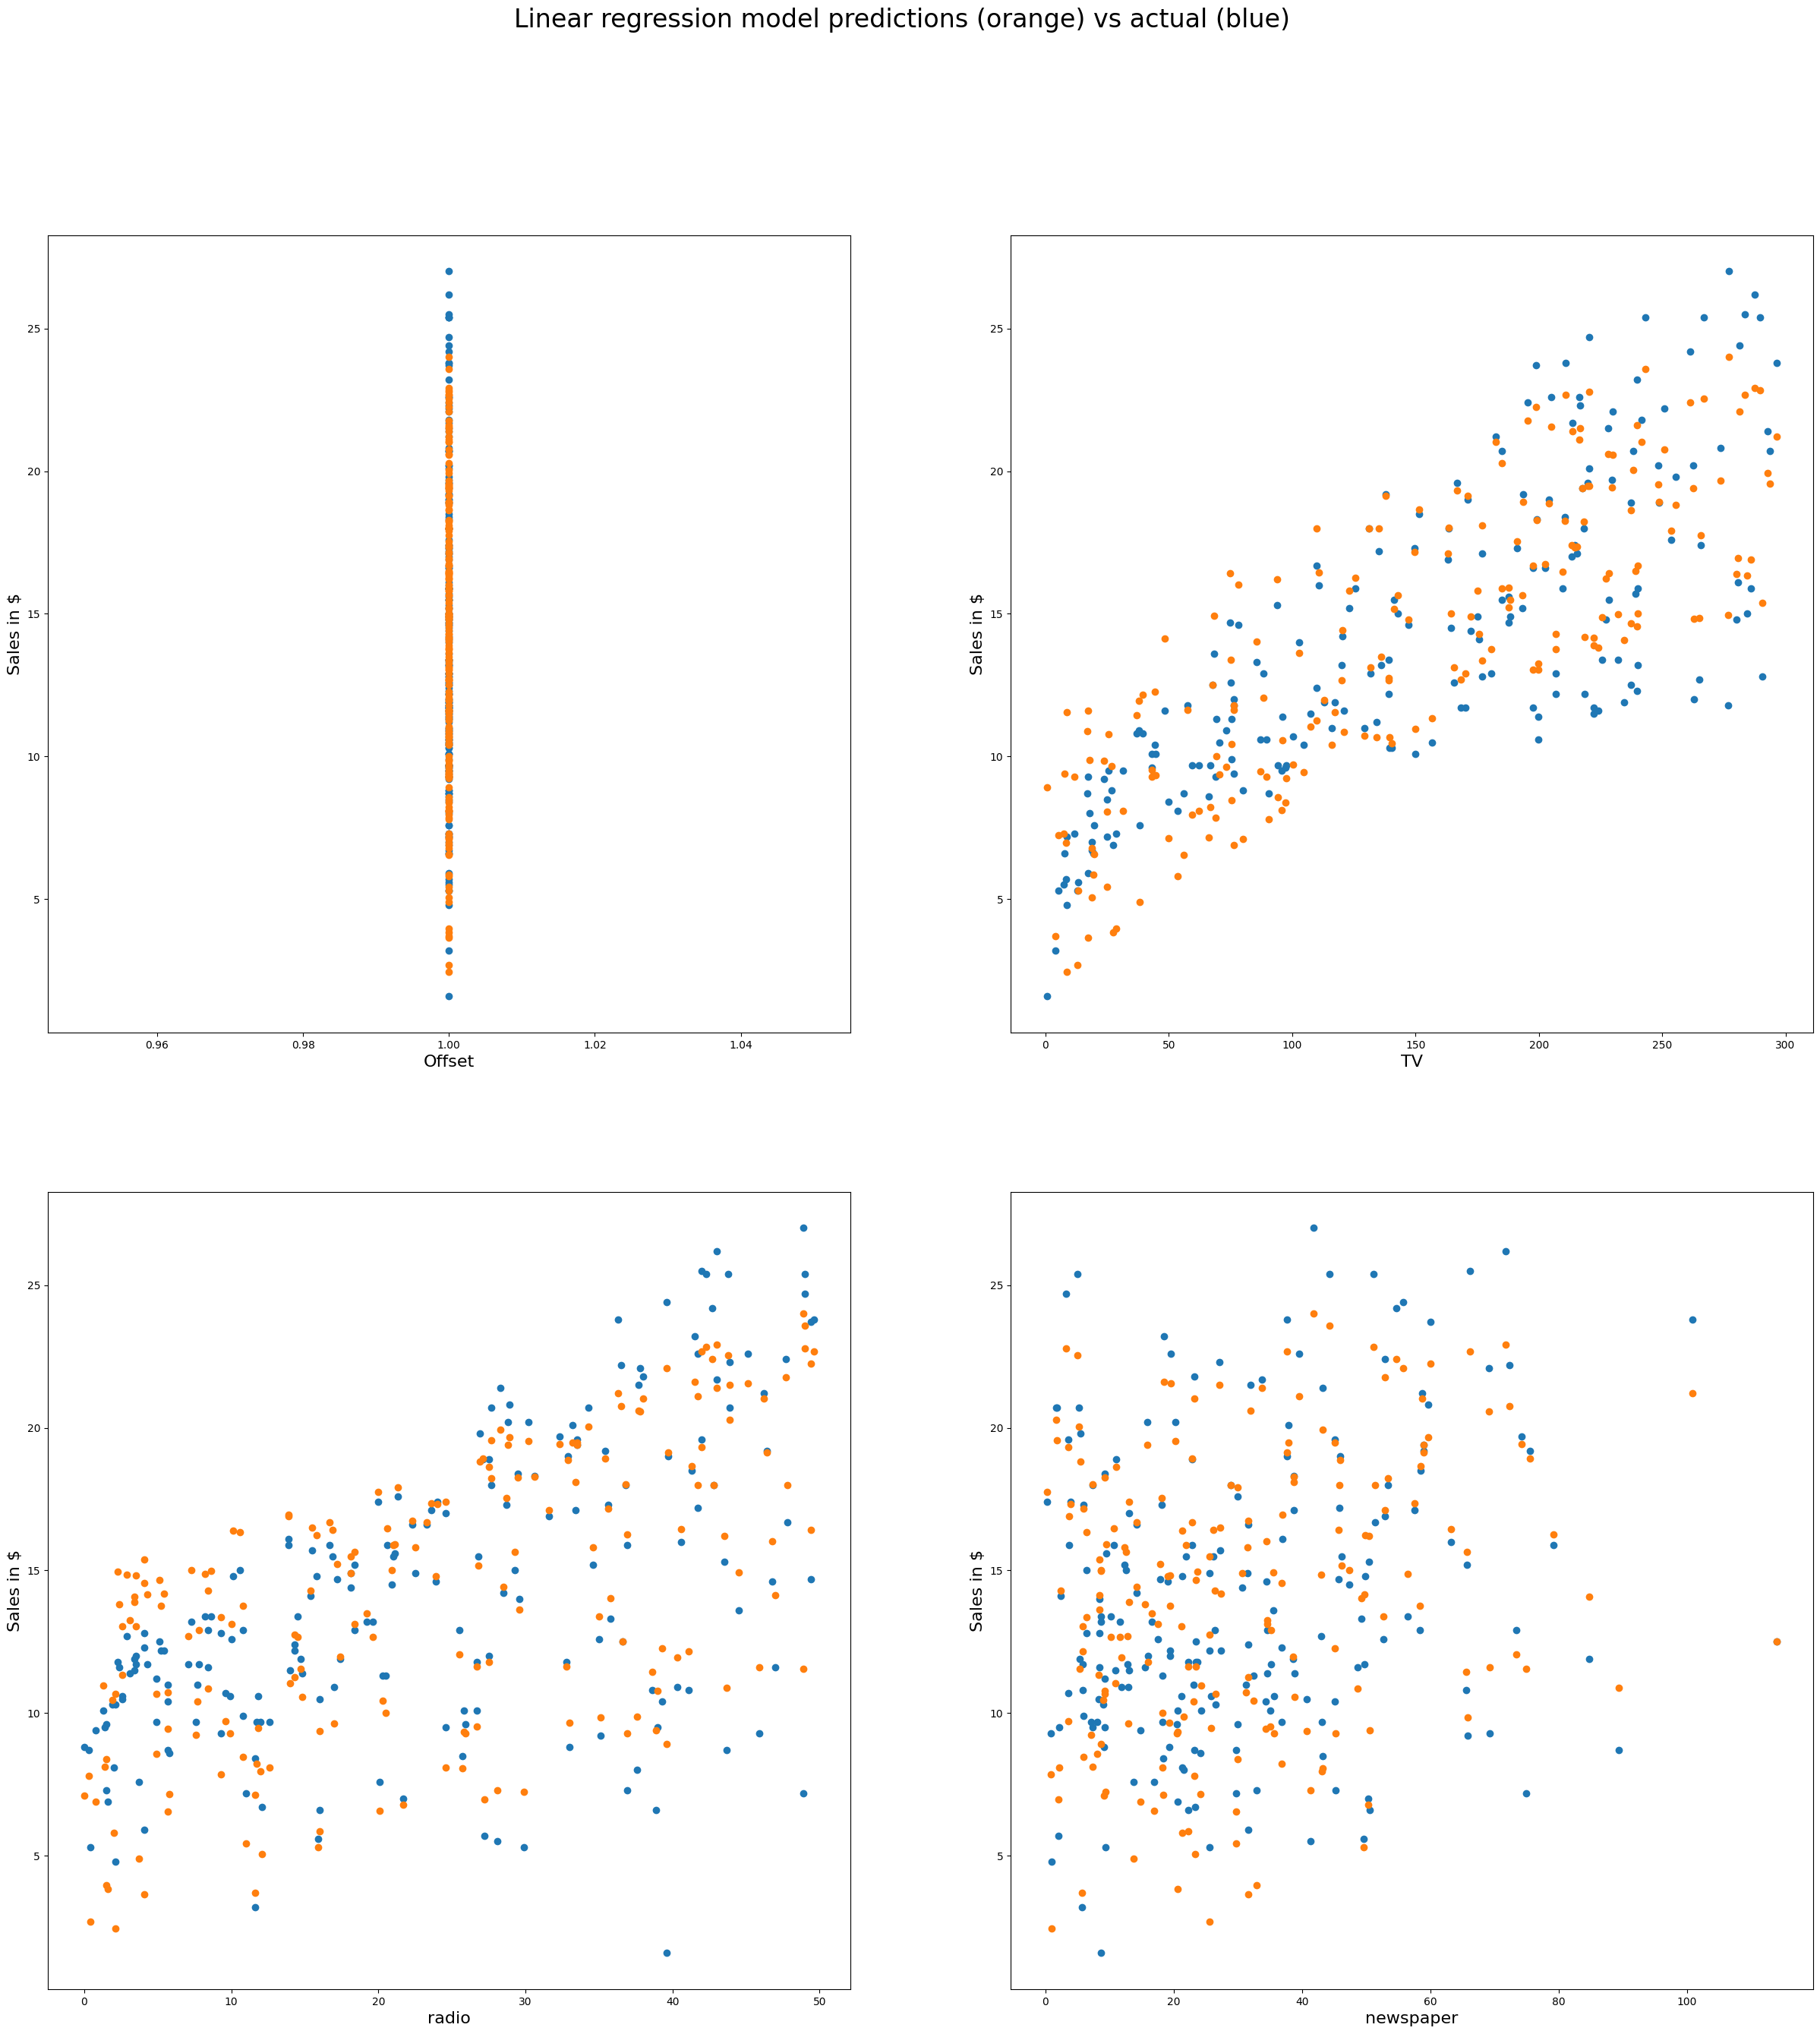

In [15]:
fig, ax = plt.subplots(figsize=(30,30), ncols=2, nrows=2)

i = 0
def make_fig(X, y):
    i = 0
    for row in range(2):
        for col in range(2):
            print(row, col)
            ax[row, col].scatter(X[:,i], y)
            ax[row, col].set_xlabel(ads.columns[i], fontsize=fontsize)
            ax[row, col].set_ylabel('Sales in $', fontsize=fontsize)
            
            i += 1
            
            
make_fig(X, y)
make_fig(X, predictions)
fig.suptitle('Linear regression model predictions (orange) vs actual (blue)', fontsize=24)



Comments on above graph: Interestingly it seems like the orange data is less spread out has less of a standard deviation
This model fits the data quite well, however a knn approach may be more useful.

In [16]:
##########################################################

# KNN

If you don't split the data you get some high variance.   
This is illustrated in the cell below.

This model says zero mean squared error however given new samples this won't go well.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_prepped, y)
predictions = knn.predict(X_prepped)
print(f'Predicted value: {predictions[0]}')
print(f'Actual value: {y[0]}')
foo = mean_squared_error(predictions, y)

print(f'Mean squared error: {foo}')



Predicted value: 22.1
Actual value: 22.1
Mean squared error: 0.0


Whatttttt zero mean squared error this thing must be good.

## Trying out the cross val function

In [18]:
from sklearn.model_selection import cross_val_score

knn_dum = KNeighborsRegressor(n_neighbors=4)

score = cross_val_score(knn_dum, X, y, scoring='neg_mean_squared_error', cv= 4)
print(-1*score)

[2.1688375 1.77015   2.515925  2.336475 ]


0 0
0 1
1 0
1 1
0 0
0 1
1 0
1 1


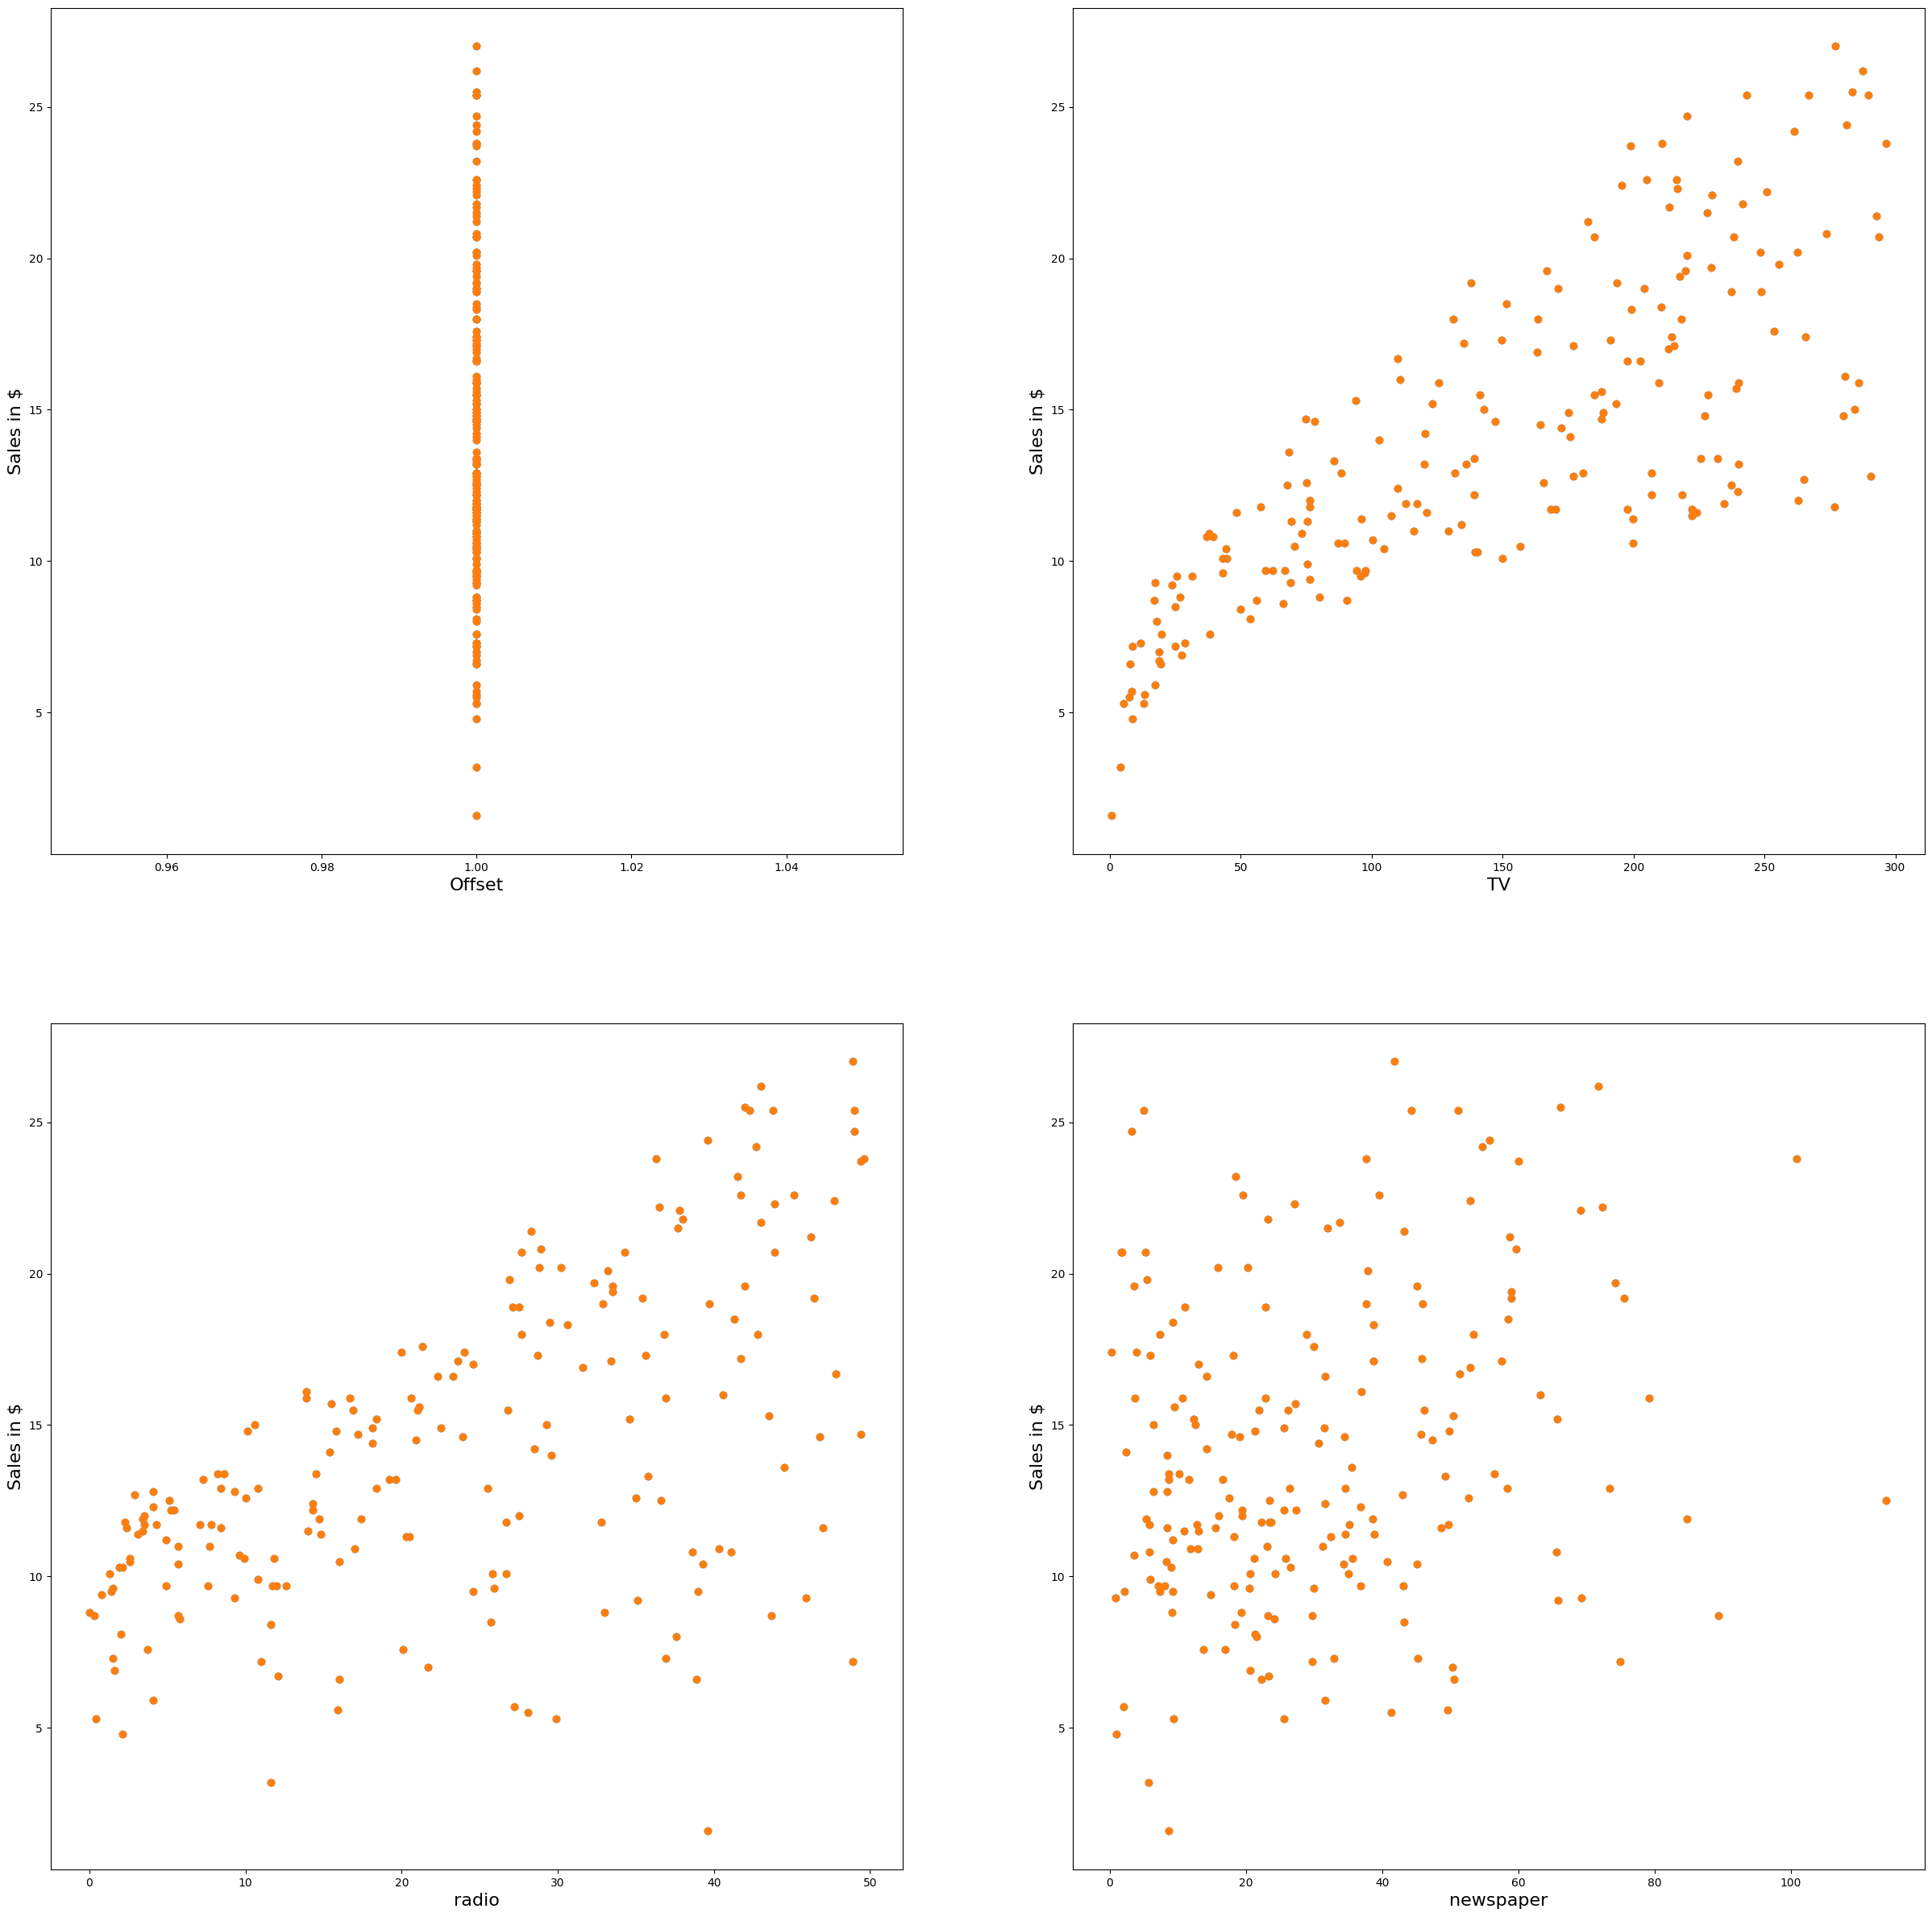

In [19]:
fig, ax = plt.subplots(figsize=(30, 30), nrows=2, ncols=2)

make_fig(X, y)
make_fig(X, predictions)

Wow knn is so good it covers the blue dots entirely

## Prepping data


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



normalize = lambda data: (data - np.min(data)) / (np.max(data) - np.min(data))
# zi = (xi – min(x)) / (max(x) – min(x))
for col in ads.columns:
    ads[col] = (ads[col] - ads[col].min()) / (ads[col].max() - ads[col].min())

X_knn = np.array(ads[['TV', 'radio', 'newspaper','sales']])
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2, random_state=42)

params = [foo for foo in range(1, 35)]


## Performing gridsearch

{'n_neighbors': 5}
(40,)
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


Text(0.5, 1.0, 'Mean absolute error vs. number of neighbors')

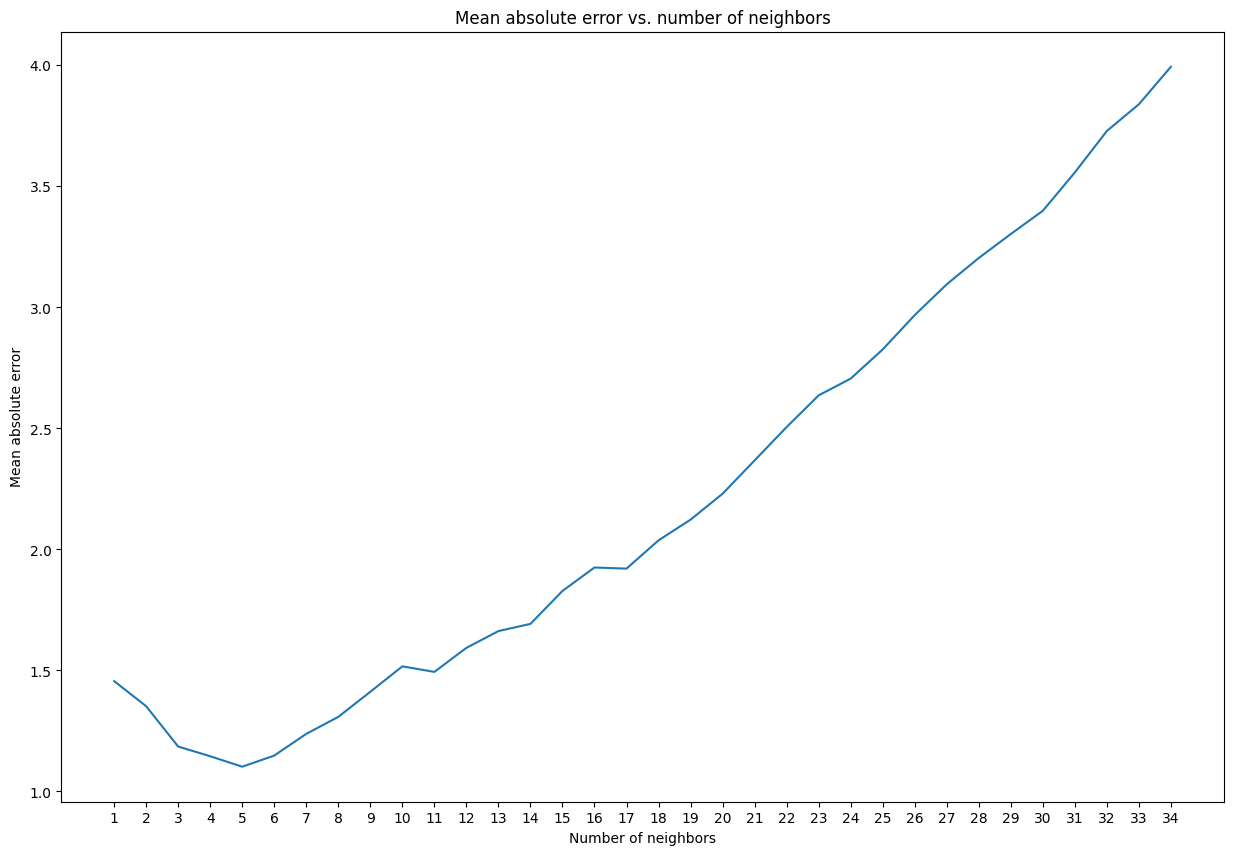

In [21]:

clf = GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': params}, 
                scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)


best_model = clf.best_params_

print(best_model)

predictions = clf.predict(X_test)
print(predictions.shape)
report = clf.cv_results_
print(report.keys())





mse = mean_squared_error(predictions, y_test)
fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(params)
x_neighbors = np.arange(1, 35)

ax.plot(x_neighbors, -1 * report['mean_test_score'])


ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Mean absolute error')
ax.set_title('Mean absolute error vs. number of neighbors')


## 5 is the best number of neighbors

0 0
0 1
1 0
1 1
0 0
0 1
1 0
1 1


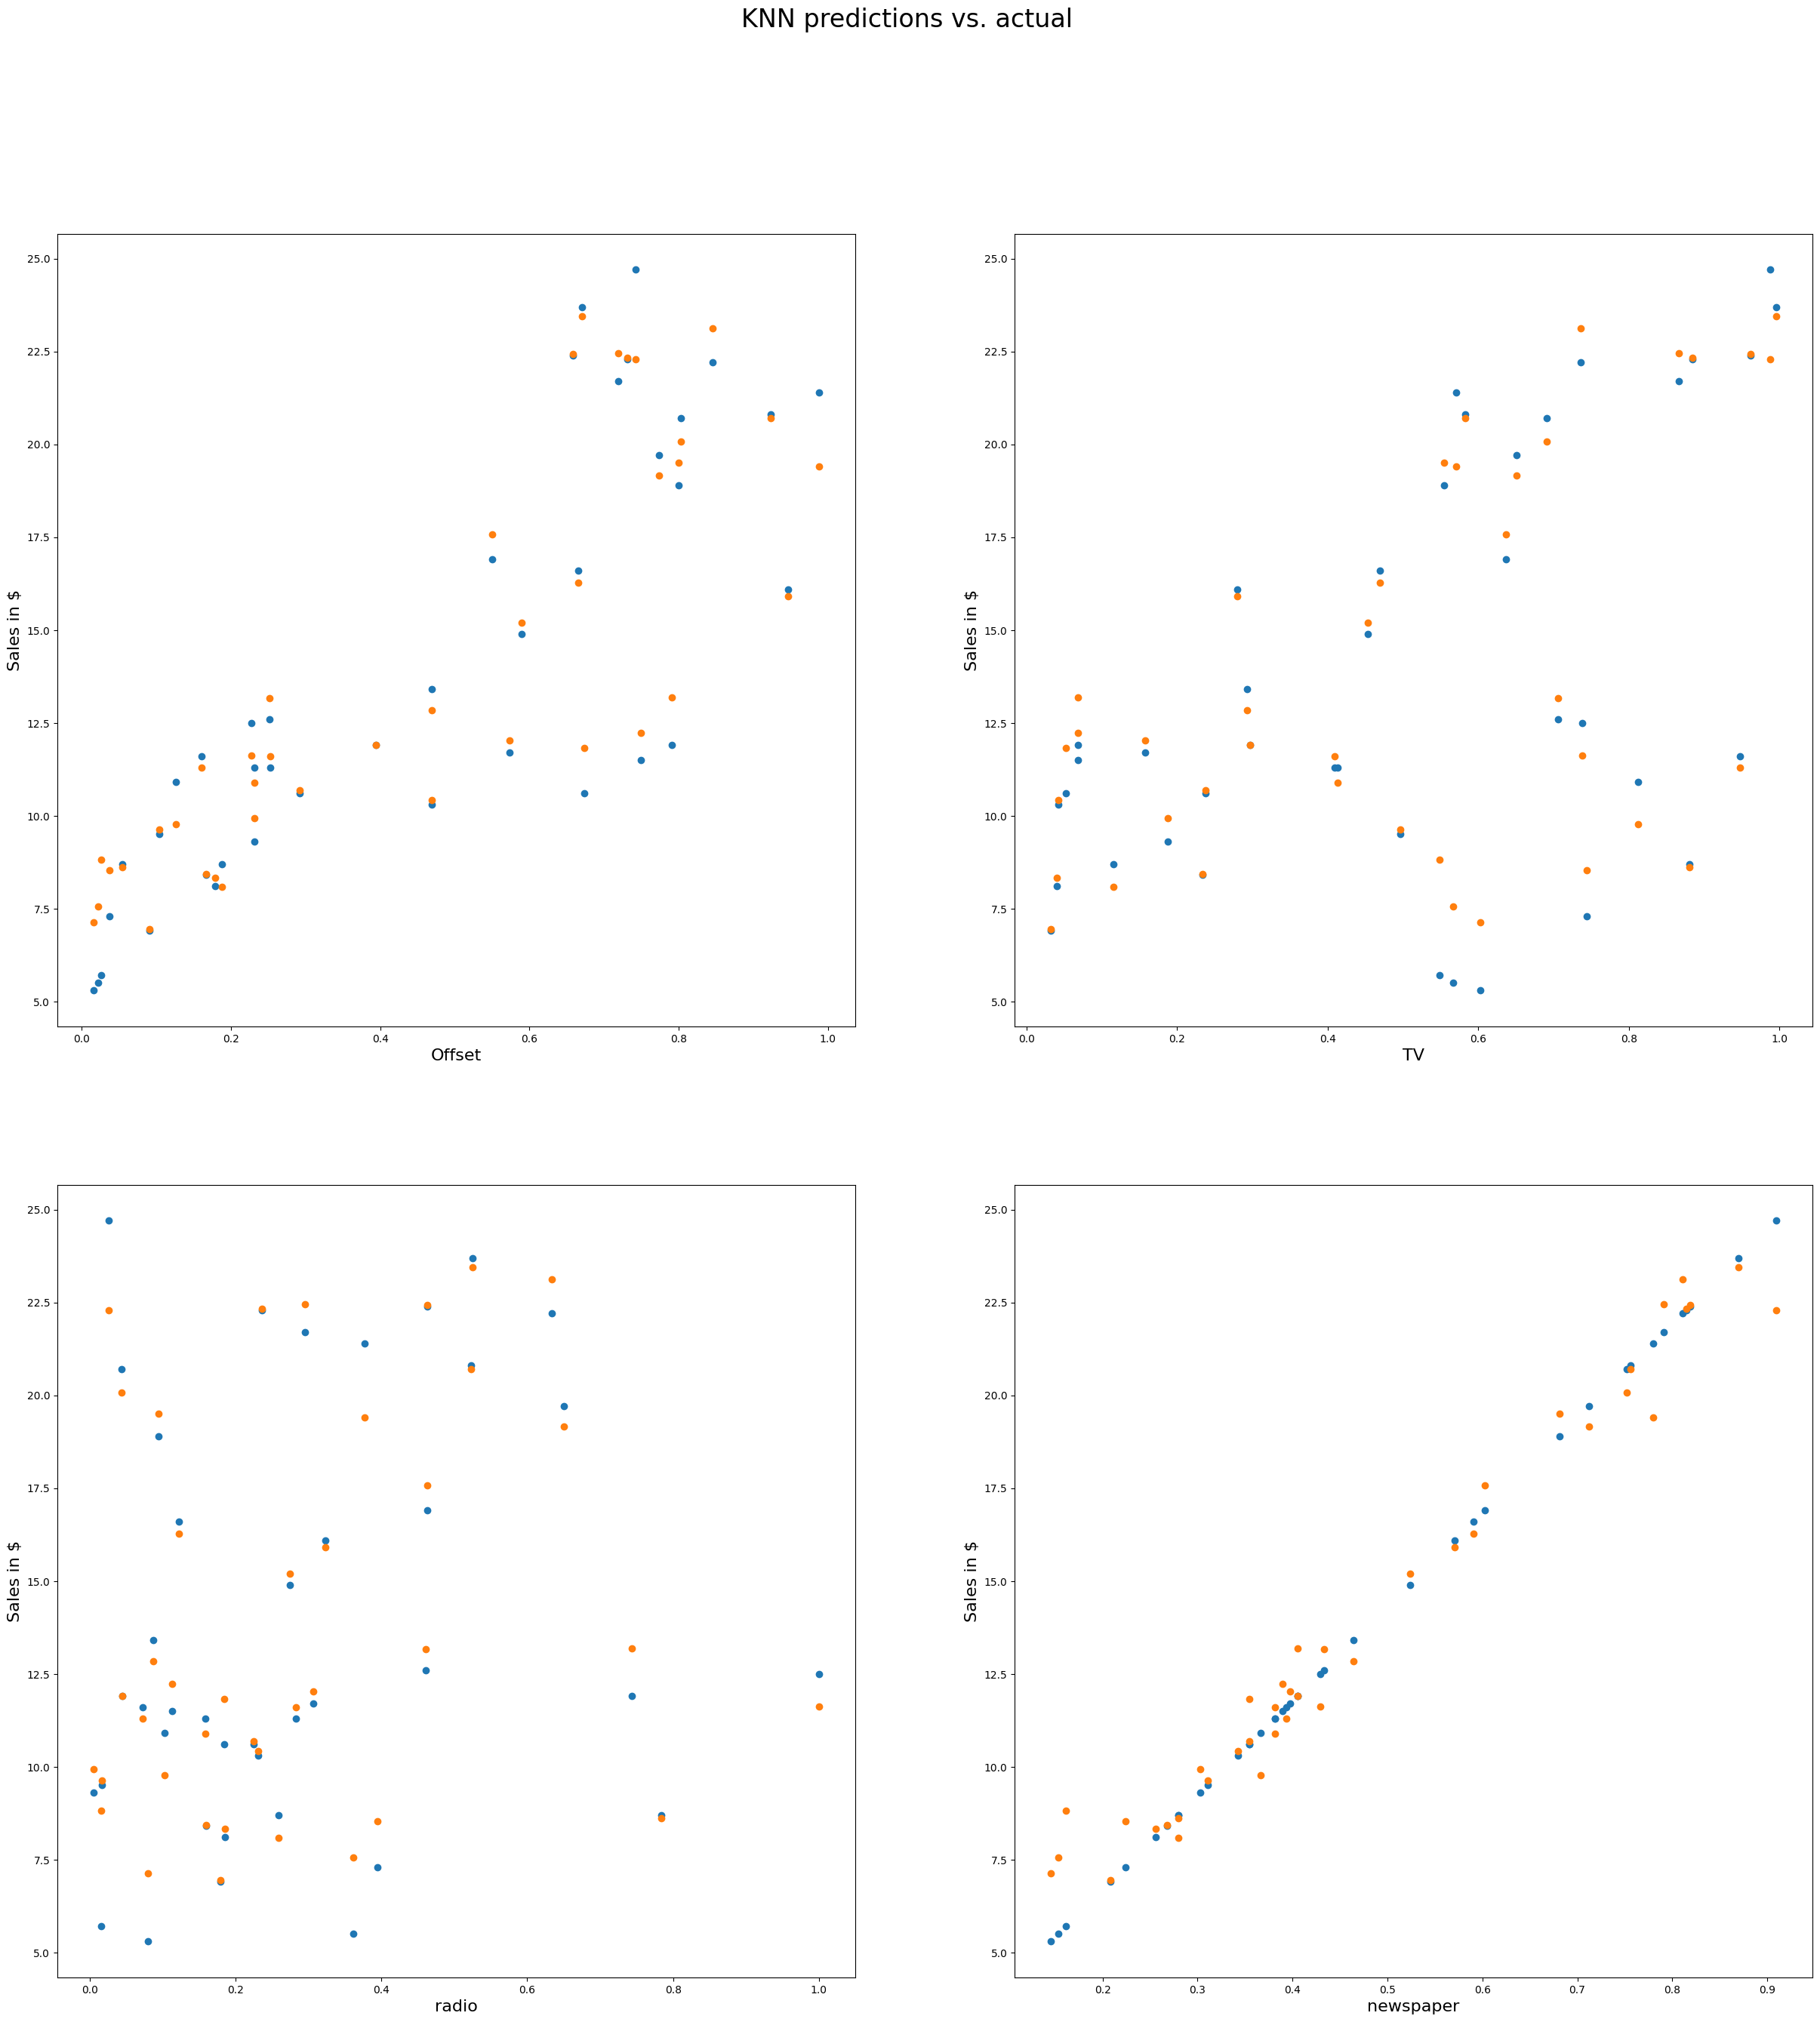

In [22]:
fig, ax = plt.subplots(figsize=(30, 30), nrows=2, ncols=2)
fig.suptitle('KNN predictions vs. actual', fontsize=24)
make_fig(X_test, y_test)


make_fig(X_test, predictions)


### Well that was a very large tangent back to the lab I guess

For some reason the data in newspaper is quite linear when scaled, not sure if this an error I made or    
it actually is the case. Sadly, I don't have enough time to look into this. That will have to be a future problem.

# Experiment 2

## Part 1

In [23]:
ads_lab = pd.read_csv(advertising_file_path)

ads_lab.drop(['Unnamed: 0'], inplace=True, axis=1)
ads_lab.head()

,Offset,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,1,17.2,45.9,69.3,9.3
3,1,151.5,41.3,58.5,18.5
4,1,180.8,10.8,58.4,12.9


## Making plots for each feature in dataset

0 0
0 1
1 0
1 1


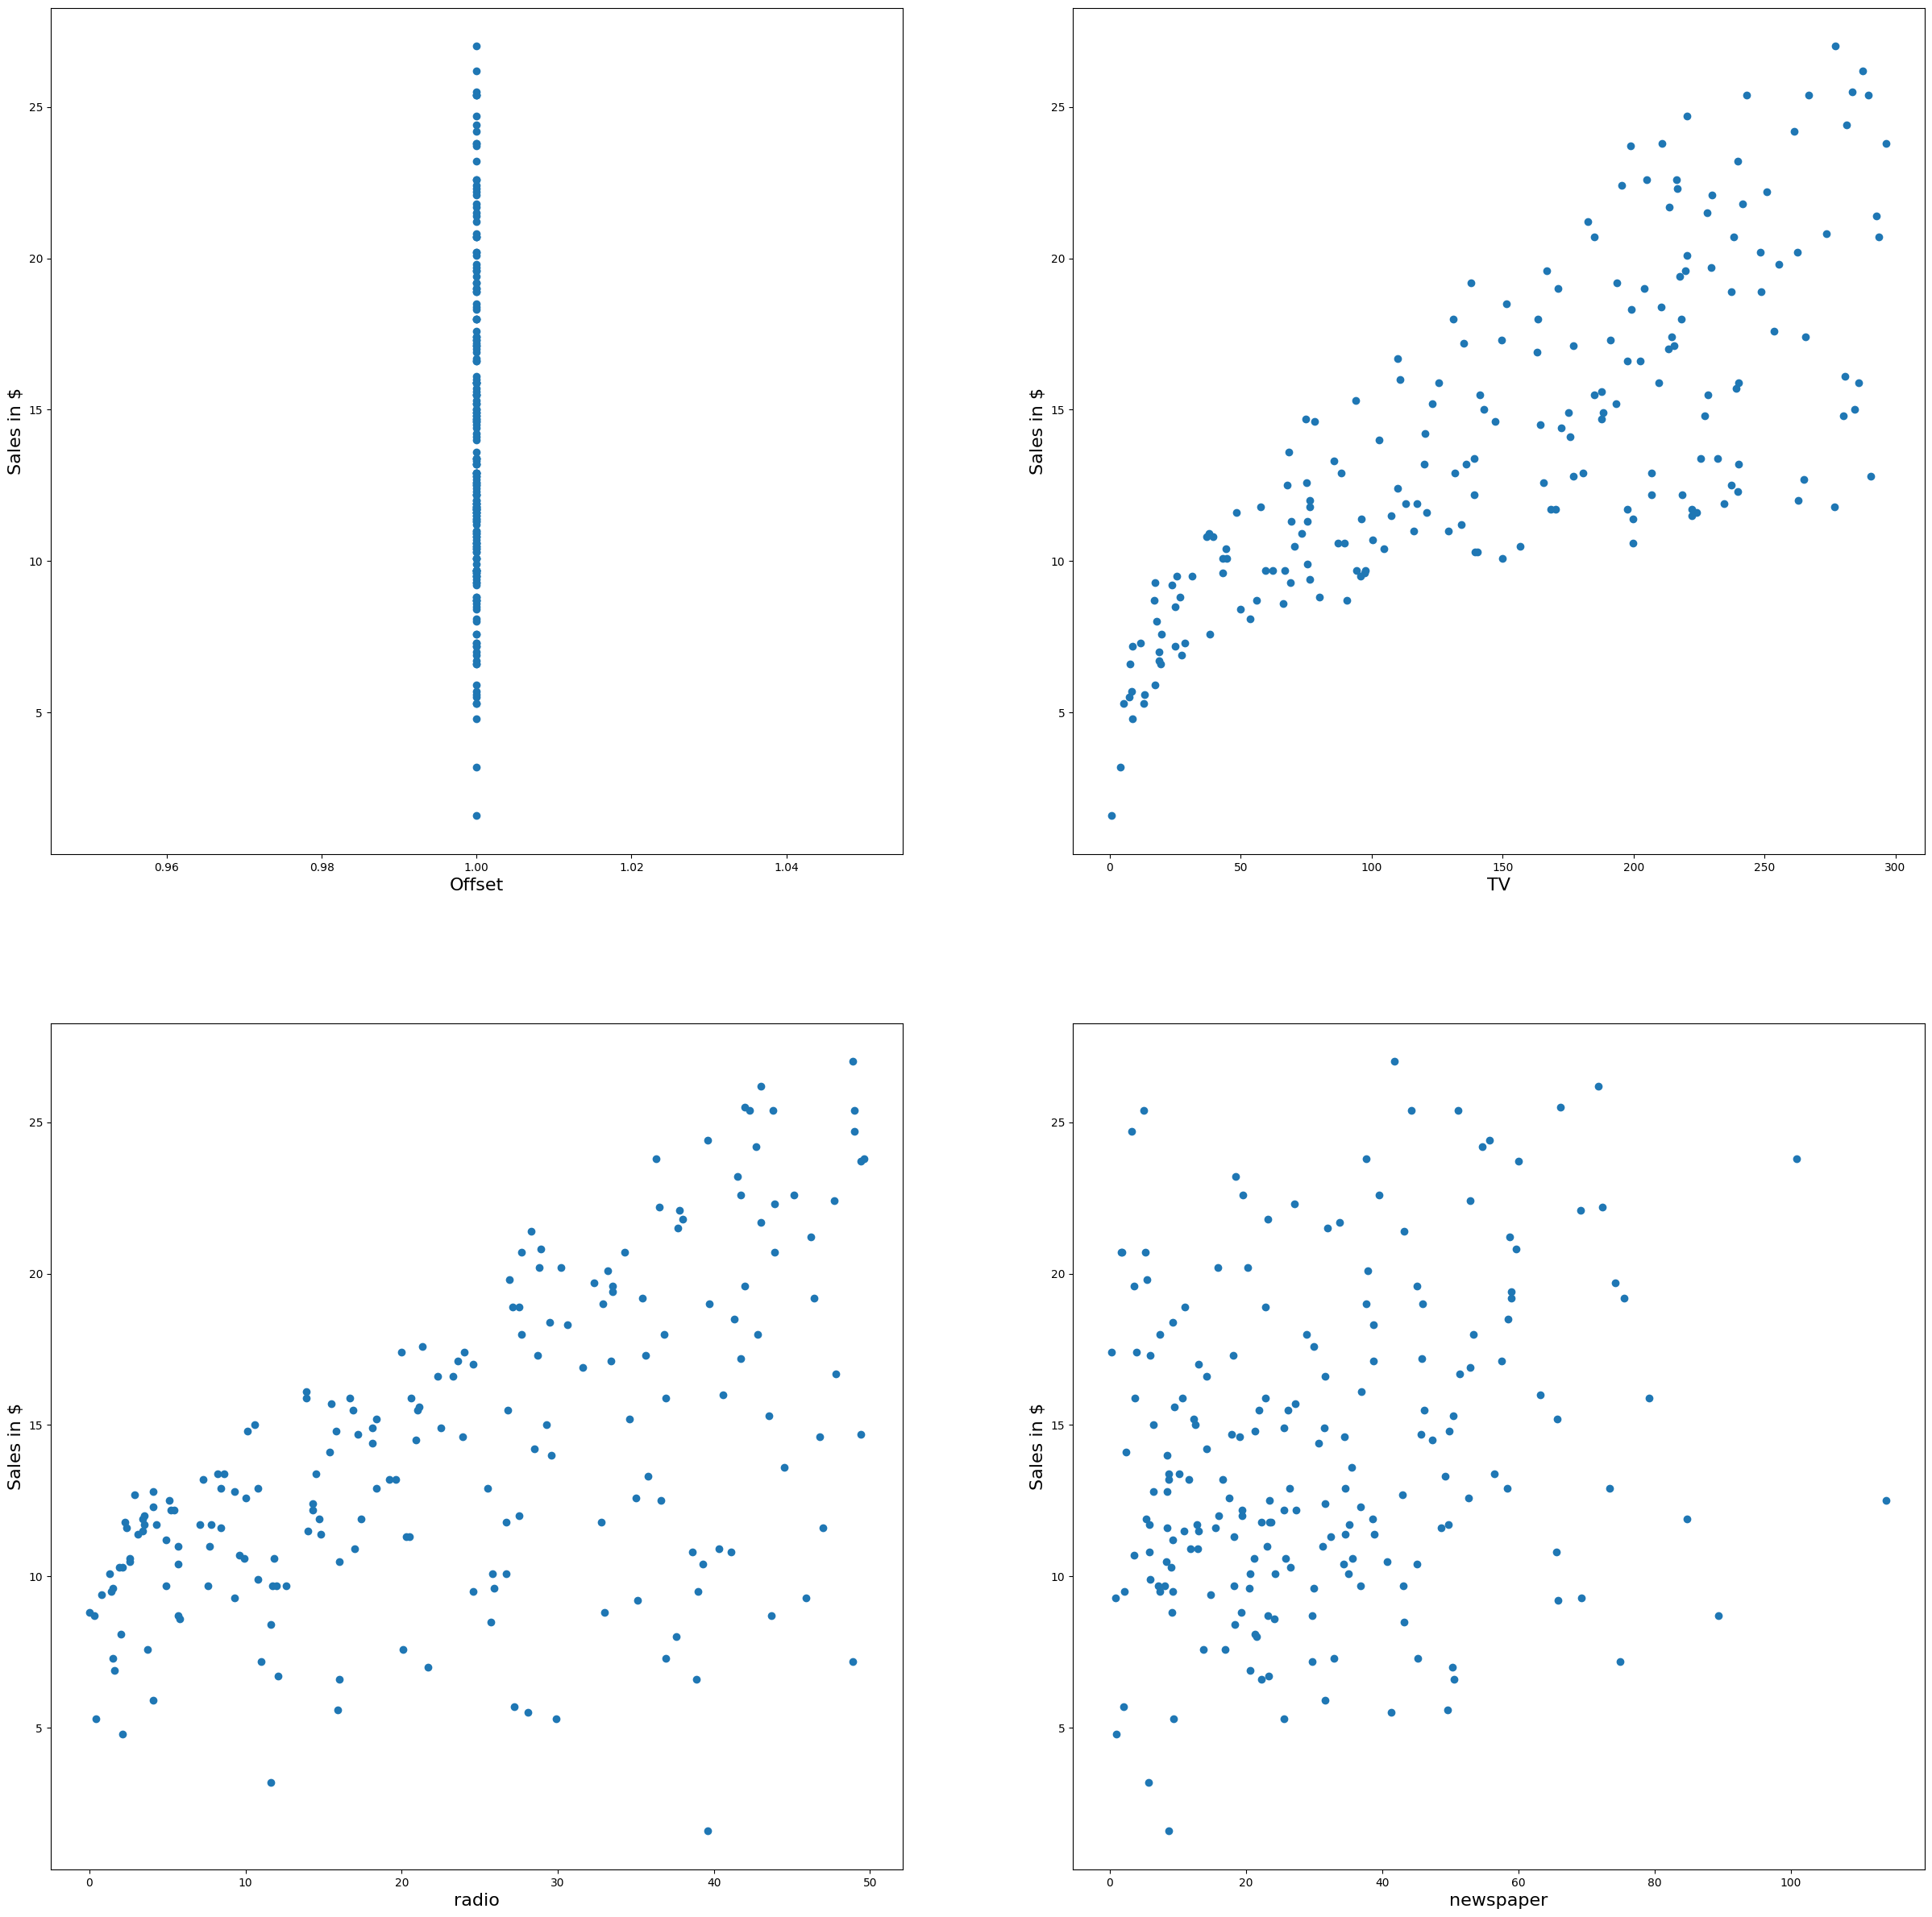

In [24]:
fig, ax = plt.subplots(figsize=(30, 30), nrows=2, ncols=2)
X = np.array(ads_lab[['Offset','TV', 'radio', 'newspaper']])
y = np.array(ads_lab['sales'])

make_fig(X, y)

## 3) Identify independent and dependent variables


Independent variables: Offset, TV, radio, newspaper   

Dependent variables: Sales in $    

Model Parameters: Offset, weight for offset, TV, radio, newspaper


## 4) Identifying model parameters

I know I cheated a little bit using the parameters from the sklearn model, but    
why have a model that sucks when you could have a model thats good.

In [25]:
model_params_sk = lin_reg.coef_
model_intercept_sk = lin_reg.intercept_
print(f'Model weights for each feature: {model_params_sk}')
print(f'Model intercept: {model_intercept_sk}')

model_params_2 = np.array([0, 0.08, 0.2, 0.1])
model_intercept_2 = 1.3


Model weights for each feature: [ 0.00000000e+00  7.82145612e-02  1.60781775e-01  1.07947886e-02
 -1.38777878e-17 -1.12786062e-04  6.83552346e-04 -1.26193102e-04]
Model intercept: 1.4929025945900012


We can see from the above cell that the squared features did not play a big role in determining output of the model.  
So for the handcoded linear regression model I will only use four variables. One can also see that the offset gets weighted out, so I will do the same

### The math we need to implement is this:

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4
$$

In [26]:
def lin_model(X, model_params, model_intercept):
    
    return np.dot(X, model_params) + model_intercept

# Once again we could make a sklearn class  




y_hand_coded = lin_model(X, model_params_sk[0:4], model_intercept_sk)
print(y_hand_coded.shape)

# making function for mean absolute error
mae = lambda x : np.sum(np.absolute(x - y)) / len(y)



(200,)


Mean absolute error: 3.43340343134817


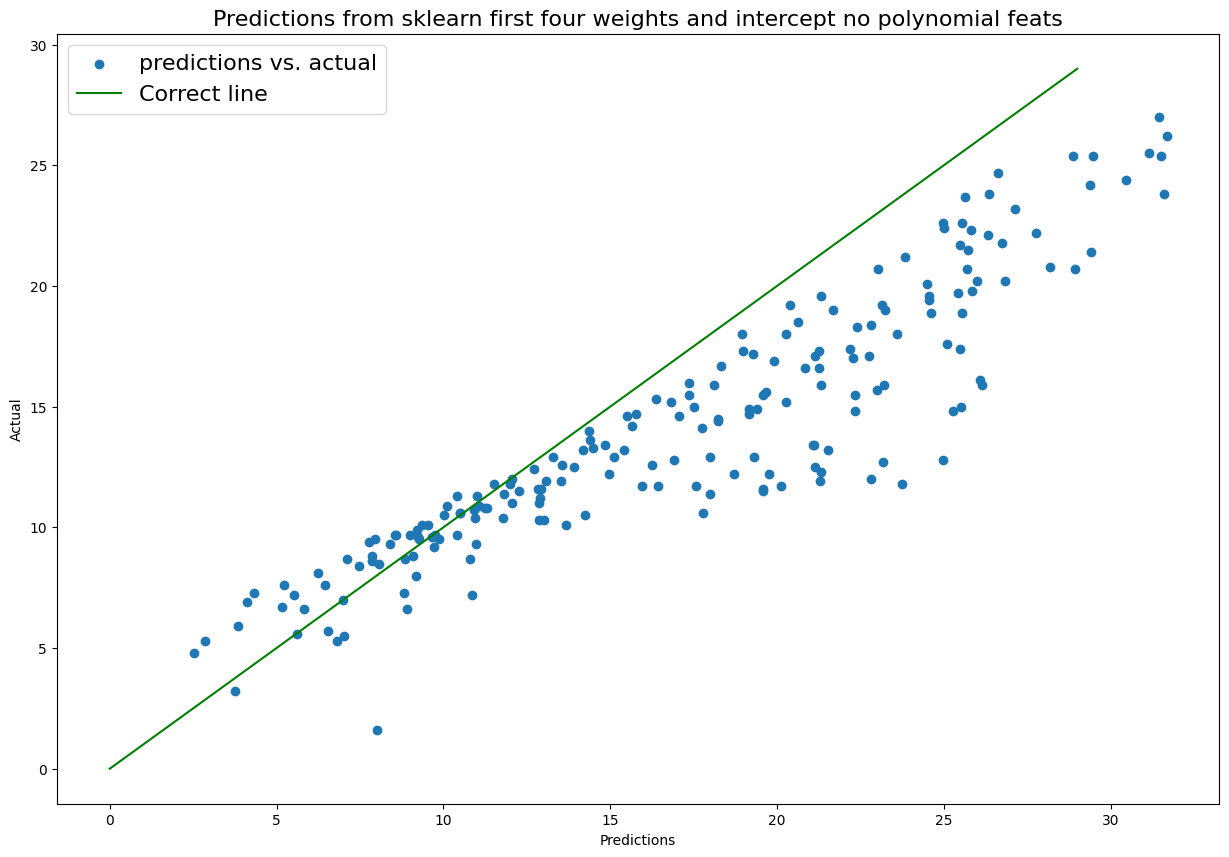

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(y_hand_coded, y, label='predictions vs. actual')
x_mesh = np.arange(0, 30)
y_mesh = np.arange(0, 30)
ax.plot(x_mesh, y_mesh, label='Correct line', color='g')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual')
ax.set_title('Predictions from sklearn first four weights and intercept no polynomial feats', fontsize=fontsize)
print(f'Mean absolute error: {mae(y_hand_coded)}')



### Comments

Evidently this model is not as good as the sklearn model so it seems like the polynomial features do play a role even though they are not as important     
as the simple features

Mean absolute error: 6.813420000000001


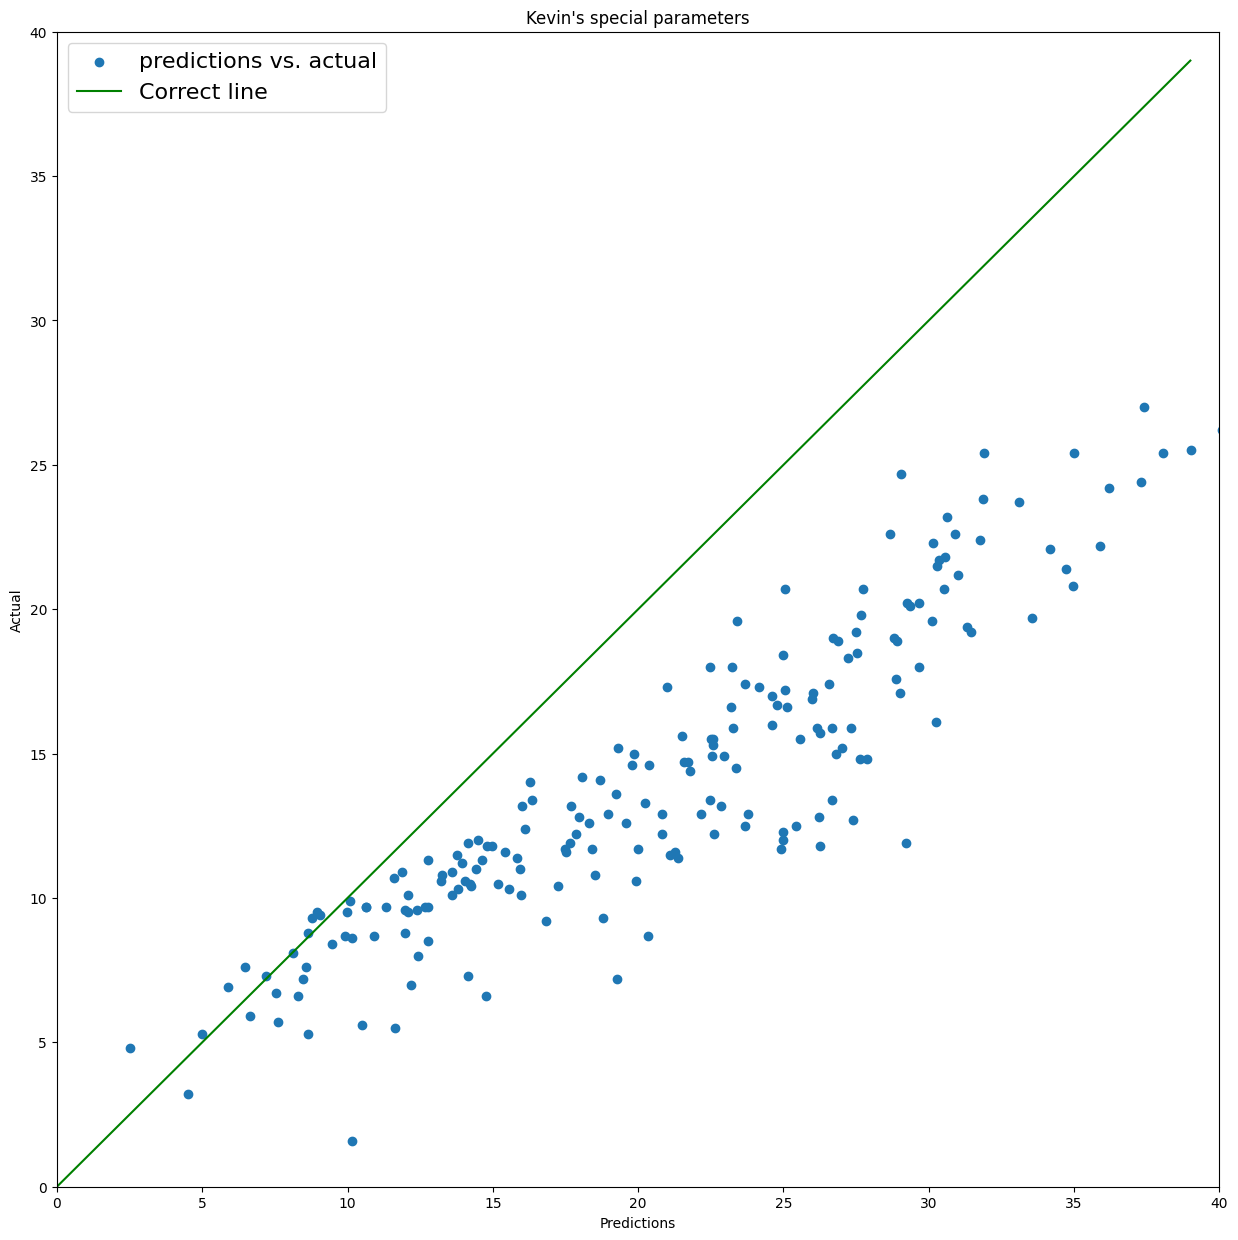

In [28]:
y_hand_coded_2 = lin_model(X, model_params_2, model_intercept_2)


fig, ax = plt.subplots(figsize=(15, 15))
plt.xlim(0, 40)
plt.ylim(0, 40)

ax.scatter(y_hand_coded_2, y, label='predictions vs. actual')
x_mesh = np.arange(0, 40)
y_mesh = np.arange(0, 40)
ax.plot(x_mesh, y_mesh, label='Correct line', color='g')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual')
ax.set_title('Kevin\'s special parameters')
print(f'Mean absolute error: {mae(y_hand_coded_2)}')

(200, 4)
(200,)


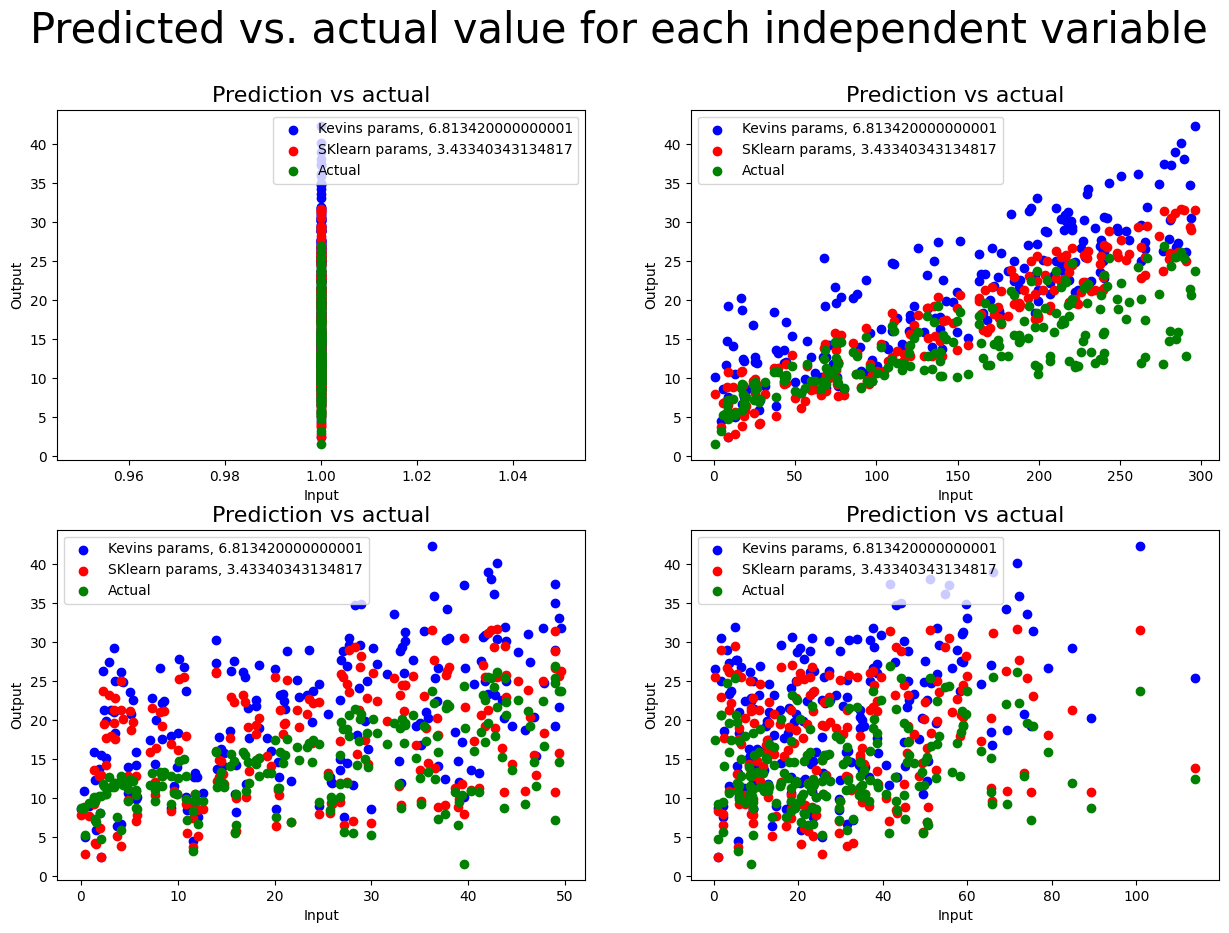

In [29]:
fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
fig.suptitle('Predicted vs. actual value for each independent variable', fontsize=30)
print(X.shape)
print(y.shape)
i = 0
for row in range(2):
    for col in range(2):
        ax[row, col].scatter(X[:,i], y_hand_coded_2, color='b', label=f'Kevins params, {mae(y_hand_coded_2)}')
        ax[row, col].scatter(X[:,i], y_hand_coded, color='r', label=f'SKlearn params, {mae(y_hand_coded)}')
        ax[row, col].scatter(X[:,i], y, color='g', label=f'Actual')
        ax[row, col].legend(loc='best')
        ax[row, col].set_title(f'Prediction vs actual', fontsize=fontsize)
        ax[row, col].set_xlabel('Input')
        ax[row, col].set_ylabel('Output')
        i += 1

Well that is a little overwhelming, but what really matters here is the mean squared error, which is    
6.8 with my special parameters and 3.4 with the first 4 SKlearn parameters. SKlearn linear regression with    
polynomial features had a 1.18 mae and 2.3 mse. KNN was the best with 1.25 mse and 0.65 mae. 

Questions: 
After you run all the experiments create a markdown cell at the beginning of your notebook to 
answer the following questions (it should appear after the introduction). Copy and paste each 
question into the cell prior to answering it. The following questions will be graded:    



1. Describe the relationship between the number of independent variables, dependent 
    variables, and model parameters. If there is no dependence between them, please state this 
    and discuss why this might be or what implications it has. 

    - The number of independent variables determines how many model parameters there are + 1 for the offset.   
    In our case there was four independent variables therfore we needed 5 model parameters.   
    The independent variables with the model parameters determine the dependent variable, because it is calculated   
    directly from the independent variables and model parameters.
    -

2. For this lab you were given datasets that had paired independent and dependent variables 
    (supervised data).  
    
    a. What would your model do if you gave it an independent variable value not from 
    this dataset?  
    - Answer: If you gave the model a independent variable that was somehow correlated to the model it would use this   
    as extra information and use it to make predictions. Most likely it will not be correlated and in the training    
    process its weight would be set to zero. We saw a similar thing happen with the offset. The offset does not have any   
    correlation to the output of the model so its weight became zero. 

    
    b. Do you think the resulting output would be correct?  
    - Answer: Most likely the models output would remain unchanged if you chose the proper weight for it (zero). If the model parameter were non zero the models output would be skewed.    


    c. How can you be sure? 
     
    - Answer: We can calculate an error metric to see how well the new model is doing and compare it to the original model.  

    -

3. You used mean absolute error to quantify the difference between your given data and model 
    predictions. Lookup (either online or from your textbook) another metric used to quantify 
    error.  
    a. Compare and contrast this new metric with mean absolute error.  
    - Another metric that could be used to quantify the error rate of the regression model is mean squared error metric. Since the error is squared smaller errors (errors < 1) become smaller and larger errors become more magnified. Whereas in mean absolute error small and large errors are quantified equally.


    b. Discuss what you think the advantages/disadvantages might be between MAE and 
    your other metric. Hint: What shape do different error functions have as you 
    change model parameters to get predictions that are closer to your observed 
    data? 
    - Both the mean squared error and mean absolute error reduce down to one easily interpretable number. The main difference between the two is what you want the model to do. If you want to optimize for trying to avoid large mistakes (outliers) mean squared error is the way to go. If being wrong by ten is more than double as bad as being wrong by 5 than mse should be used. If all error should be treated the same than mae should be used.   
    -


    
4. We had you plot multiple figures for experiment 2.

    a. Can you think of a way to plot 2 independent variables and the dependent variable 
    on the same plot?  
    - Answer: One can simply plot both features in the same plot by calling scatter twice. Another way this could be done is reducing the features down into one variable. For example if in your data you had the columns width, height, length you could most likely reduce those down to one variable volume. Another thing that could be done is using a three dimensional plot. 

    b. What about a way to visualize 3 independent variables and the dependent variable 
    on the same plot? 4 and 1?  
    - This gets a little bit more tricky. Depending on the data you could put some of the features through a function to try and reduce the number of features. Dimensionality reduction can be done. An overlap could be done, but this could get hectic and scales could be vastly different between variables. Another way to incorporate more than 3 dimensions in a plot is to assign how big a point is to a feature. Depth and hue can also be assigned to further dimensions getting to a total of six possible dimensions. After this plotting in a scatter plot sense gets very difficult. 

    c. What about a way to visualize a dataset of 100 features and 1 dependent variable 
    on the same plot?  
    - Correlation matrix could work, it would be quite large. At this point it is nearly impossible to visualize 100 dimensions in a single plot. 
    d. With these plots in mind, describe how the error metric can help. 
    - Error metrics can help quantify how well a model is doing. All a model is, is all the features put through a mathematical function and producing a single output. Comparing this value to the actual value gives us an error metric. The error metric can tell you if a model is doing well. It can tell you if your model is underfitting or overfitting and therefore tell you about your data. For example if you have a multiple linear regression model, however your metric is showing high bias it is telling you that your model is to simple and that perhaps the data is not linear, but polynomial. 
    -



5. How well did the model parameter sets you chose for experiment 2 perform? With the 
    methods and tools that you have at your disposal, can you think of a more structured way to 
    find a good set of parameters rather than picking a set and checking? Hint: It is relatively 
    inexpensive to evaluate these models. How could you use a loop, or set of loops, to find a set 
    of model parameters that have low error? 

    - Answer: You could use the grid search method from sklearn to define a parameter grid for all the   
    weights in the model as well as the intercept and let it do the work. Furthermore, there is a mathemtical    
    solution called the normal equation which can figure out the best possible weights to fit the data, however   
    its time complexity is O(n^2.4 - 3) depending on the implementation. With this dataset that is not a problem,    
    however when features and data points grow this should be avioded and some kind of version of gradient descent    
    should be used. Or now that I think of it we could use a evolutionary algorithm to train the weights of the model    
    as well. 

    - If the only thing we were allowed to use was for loops. What I would do is I would create an evenly spaced array   
    of weights for the first weight of the model. Write a for loop to loop through all of these and find the weight with the lowest error. Than repeat this process for each weight in the set.
    
    - I am unsure if training one weight at a time would work so one thing that would for sure work is to make a quintuple   
    for loop and loop through all the weights simultaneously and save the best model
    